**Title:** Penguin EDA <br>
**Date:** 2023-01-07 <br>
**Author:** Jordaan Clarke

In [87]:
# Import the libraries that will be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset.
data = pd.read_csv("penguins_lter.csv")

**Description:** <br>

An exploratory analysis of the `penguins_lter.csv` dataset, looking at the physical characteristics between penguin species within the Anvers region.

To start with, let's have a look at what's in the dataset and what it consists of.

In [88]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


Nothing too exciting here; around 350 records, and a good number of numeric columns (seemingly already in the correct format) which should provide good material in the later analysis.

**Null values**<br>

In [89]:
data.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

`data.info()` provides the null count as well, but it's a bit easier to look at like this. We can see that most of the values are present; with the exception of the `Comments` column, missing data represents less than 5% in each of the affected columns. It may be possible to just average these based on a common identifier, but let's see. 

From this view, we can see that column names will be a problem, with whitespaces and extra information in parenthesis; this will affect the use of dot-notation and make referencing these columns a bit of a pain. The columns `Delta 15 N (o/oo)` and `Delta 13 C (o/oo)` don't tell us much, but a quick search online reveals that they refer blood isotope levels for nitrogen and carbon. These columns could be formatted and renamed. 

It would be useful at this point to see a few of the records and get a better idea of what we're working with. 

In [90]:
data.head(15)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/9/07,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/9/07,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


**Data cleaning overview**

From here, we can identify a few candidate columns for cleaning:

1. `Date Egg` is recorded with dtype `object`, but we can see that it contains date values; these will need to be converted to `datetime` so they can be analysed. <br>

1. `Species` seems to include both the common name and the scientific name; this could be split across two columns.

1. `Comments`: this is normally a column that would be dropped, but it seems to contain information on why certain values are missing. Based on the entries, the data seems to be missing completely at random (MCAR). This is useful, and we can comment on this in the analysis. 

1. `Individual ID` would suggest that it identifies the individual birds in each record, which would be useful to the original researchers working in the field with them, but this isn't something that will aid this particular analysis. 

More generally however, it would be useful to check how many unqiue values there are for each object column, to see whether any columns can be dropped (e.g. if all values are the same), or if the information recorded will be useful for comparison.

**Converting the dates**

In [91]:
# Display the dates and check for format consistency.
data["Date Egg"].unique()

array(['11/11/07', '11/16/07', '11/15/07', '11/9/07', '11/12/07',
       '11/10/07', '11/13/07', '11/19/07', '11/6/08', '11/9/08',
       '11/15/08', '11/13/08', '11/11/08', '11/14/08', '11/8/08',
       '11/2/08', '11/7/08', '11/17/08', '11/5/08', '11/10/08', '11/9/09',
       '11/15/09', '11/20/09', '11/12/09', '11/17/09', '11/18/09',
       '11/22/09', '11/16/09', '11/21/09', '11/23/09', '11/10/09',
       '11/13/09', '11/14/09', '11/26/07', '11/21/07', '11/28/07',
       '11/22/07', '11/30/07', '12/3/07', '11/25/08', '11/24/08',
       '11/27/09', '11/19/09', '11/27/07', '11/18/07', '11/29/07',
       '11/4/08', '11/3/08', '11/25/09', '12/1/09'], dtype=object)

The dates appear to be in MM/DD/YY format, but there are no leading zeroes for days less than ten and the century is missing from the year. To resolve, we need to include the leading zeroes, add the century and change the format, so it reads as: YYYY/MM/DD. We also need to ensure the dtype is `datetime` so that it can be analysed.

We can also see that most of the dates occur in November, with a small number recorded in December. This would skew the results if this data were plotted on a time series. 

In [92]:
# Convert the dates to datetime objects.
date_parsed = [datetime.strptime(y, "%m/%d/%y") for y in data["Date Egg"]]

# Convert the list of dates into a series object.
date_parsed = pd.Series(date_parsed)

# Add the series to the dataframe after the 'Date_Egg' column.
data.insert(9, "egg_date", date_parsed)
display(data.loc[:, ["Date Egg", "egg_date"]].head())
print(f"Unparsed date type: {data['Date Egg'].dtype}")
print(f"Parsed date type:   {data['egg_date'].dtype}")

# Drop the original date column. 
data.drop(columns = "Date Egg", inplace = True)

,Date Egg,egg_date
0,11/11/07,2007-11-11
1,11/11/07,2007-11-11
2,11/16/07,2007-11-16
3,11/16/07,2007-11-16
4,11/16/07,2007-11-16


Unparsed date type: object
Parsed date type:   datetime64[ns]


The dates have been amended and are now in the correct format. We've removed the original column and replaced it with a new one containing the parsed values.

**Modifying the species name**

In [93]:
# Checking the unique of values and the format.
data["Species"].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

There seem to be only three unique species. We can see that the formatting is inconsistent with some words in title case and others in lowercase; these should all be changed to title case. The scientific names enclosed in parenthesees can also be split into a separate column.

In [94]:
# Capture the names in a list.
name_clean = [y for y in data.Species]

# Separate the common name from the scientific name, remove the parentheses and format all words in title case.
name_clean = [y.split(" (") for y in name_clean]
name_clean = [x.rstrip(")") for y in name_clean for x in y]
name_clean = [y.title() for y in name_clean]

# Declare two empty lists to capture the names.
common = []
scientific = []

# Iterate over the names and append to the relevant list.
for x, y in enumerate(name_clean, 0):
    if x % 2 == 0: common.append(y)
    else: scientific.append(y)

# Add new columns for the names, and drop the original column.
data.insert(2, "common_name", common)
data.insert(3, "scientific_name", scientific)
data.drop(columns = "Species", inplace = True)
data.iloc[:2, 2:4]

,common_name,scientific_name
0,Adelie Penguin,Pygoscelis Adeliae
1,Adelie Penguin,Pygoscelis Adeliae


The names are now separated and formatted.

**Missing Data**

Now we can take a look at the rows with missing data. From checking the columns earlier, we know which ones do not contain missing values; removing these from the view will enable us to focus on the affected rows. `Comments` will also be removed from the view, because while containing missing values, we are not interested in amending these; also, there are 318 missing values in that column, which would return many more values than is practical and clutter the view.

In [95]:
# Declare a list of columns that will be filtered out.
col = ["Comments",
       "Sample Number",
       "common_name",
       "scientific_name",
       "Region",
       "Island",
       "Stage",
       "Individual ID",
       "Clutch Completion"]

# Drop the specified columns, filter by rows with missing data, and capture the indicies. 
missing = data.drop(columns = col, inplace = False)
missing = missing[(missing.isnull()).any(axis = 1)]
missingdex = missing.index

# Remove "Comments" from the list of columns to drop.
col.pop(0)

# Create a new view for the previously identified rows with missing data, but also include the comments for those rows.
rows = data.iloc[missingdex]
rows = rows.drop(columns = col, inplace = False)
print(f"Number of rows: {len(rows)}")
rows

Number of rows: 19


,studyName,egg_date,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
3,PAL0708,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
8,PAL0708,2007-11-09,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,2007-11-09,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.
10,PAL0708,2007-11-09,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315,No blood sample obtained for sexing.
11,PAL0708,2007-11-09,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,No blood sample obtained.
12,PAL0708,2007-11-15,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
13,PAL0708,2007-11-15,38.6,21.2,191.0,3800.0,MALE,NaN,NaN,Not enough blood for isotopes.
15,PAL0708,2007-11-16,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
39,PAL0708,2007-11-13,39.8,19.1,184.0,4650.0,MALE,NaN,NaN,Nest never observed with full clutch. Not enou...


There are 19 rows containing the missing data we are interested in, and we can now see the comments for those affected rows to try and learn why. For many of the rows, it seems that there was some kind of problem with the blood samples that were taken from each penguin, where either no blood sample was obtained, or not enough blood was obtained in the sample to correctly identify isotope levels and/ or gender. We can see that for two rows (rows `3` and `339`), all of the numerical data is missing, with one of the comments indicating that the penguin was not sampled at all. In the remaining columns, no reason is provided.  

In [96]:
filter_row = rows.drop(index = [3, 339], inplace = False)
filter_row.isnull().sum()

studyName               0
egg_date                0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                     8
Delta 15 N (o/oo)      12
Delta 13 C (o/oo)      11
Comments                5
dtype: int64

Keeping in mind that we're not interested in `Comments`, if we exclude rows `3` and `339`, we can see that the remaining missing values are contained in the following columns:
<br>

1. `Sex`: 8<br>
1. `Delta 15 N (o/oo)`: 12
1. `Delta 13 C (o/oo)`: 11
<br>

All of this still represents less than 5% of the total data, and wouldn't hurt the results if removed. For `Sex`, there isn't really a way to average this, as it's a nominal, dichotomous value. 

If we were to capture all of the populated values in any of these columns for discrete analysis, we wouldn't be able to compare them fairly with other variables, as we'd end up with asymmetrical column lengths. They could be used as data points to get a better idea of what the true distribution is, but at such a low percentage of the total, which itself is also quite small, it's just not worth the effort.

In [97]:
# Show the value ranges for columns containing numerical data.
data.iloc[:,10:17].describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


To better illustrate the effort to value obtained, we can look at the range of values in the dataset before dropping any rows. The other columns are included here for comparison, but the main focus is on `Delta 15 N (o/oo)` and `Delta 13 C (o/oo)`. We can see from looking at these values that the ranges are quite small, with minimum, maximum, average and percentile values all within close proximity. 

In [98]:
# Filter out all rows with missing data and show the value ranges for columns containing numerical data.
check = data.drop(index = missingdex, inplace = False)
check.iloc[:,10:17].describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


After removing the missing values, we can see that the ranges have not differed by that much, and will not adversely impact any conclusions drawn from the data. These can safely be removed.

In [99]:
# Remove all rows with missing data.
data = data.drop(index = missingdex, inplace = False)
data

,studyName,Sample Number,common_name,scientific_name,Region,Island,Stage,Individual ID,Clutch Completion,egg_date,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
1,PAL0708,2,Adelie Penguin,Pygoscelis Adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin,Pygoscelis Adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5,Adelie Penguin,Pygoscelis Adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin,Pygoscelis Adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin,Pygoscelis Adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,119,Gentoo Penguin,Pygoscelis Papua,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,2009-12-01,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538,NaN
340,PAL0910,121,Gentoo Penguin,Pygoscelis Papua,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo Penguin,Pygoscelis Papua,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo Penguin,Pygoscelis Papua,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


**Checking unique values**

In [100]:
# Identify the number of unique values in each column.
data.nunique()

studyName                3
Sample Number          152
common_name              3
scientific_name          3
Region                   1
Island                   3
Stage                    1
Individual ID          188
Clutch Completion        2
egg_date                50
Culmen Length (mm)     159
Culmen Depth (mm)       79
Flipper Length (mm)     53
Body Mass (g)           93
Sex                      3
Delta 15 N (o/oo)      325
Delta 13 C (o/oo)      325
Comments                 1
dtype: int64

Unique values vary across all columns, and we can ignore most of them. The ones of interest here are `Sex` which contains three values, `Sample Number` and `Individual ID`. 

We would expect `Sex` to only contain two values as we've already removed missing/ NaN values. For `Sample Number` and `Individual ID`, we would expect these to contain mostly unique values, but we can see what they actually contain to determine if they will be useful.

Also of note are `Region` and `Stage`, as they contain one value each. This would indicate that they are the same for all rows and can therefore be removed from the dataframe. We can check each entry first and make a note of the value before doing so.

We can also check `studyName` and `Island`, which both contain three values. These could be used to group the data when comparing variables.

In [101]:
# Display the unique values for each column of interest.
print(f"Sex:\n    {data['Sex'].unique()}")
print(f"Region:\n    {data['Region'].unique()}")
print(f"Stage:\n    {data['Stage'].unique()}")
print(f"Study Name:\n    {data['studyName'].unique()}")
print(f"Island:\n    {data['Island'].unique()}")
print(f"Individual ID:\n    {data['Individual ID'].unique()}")
print(f"Sample Number:\n    {data['Sample Number'].unique()}")

Sex:
    ['FEMALE' 'MALE' '.']
Region:
    ['Anvers']
Stage:
    ['Adult, 1 Egg Stage']
Study Name:
    ['PAL0708' 'PAL0809' 'PAL0910']
Island:
    ['Torgersen' 'Biscoe' 'Dream']
Individual ID:
    ['N1A2' 'N2A1' 'N3A1' 'N3A2' 'N4A1' 'N4A2' 'N8A1' 'N9A1' 'N9A2' 'N10A1'
 'N10A2' 'N11A1' 'N11A2' 'N12A1' 'N12A2' 'N13A1' 'N13A2' 'N17A1' 'N17A2'
 'N18A1' 'N18A2' 'N21A1' 'N21A2' 'N22A1' 'N22A2' 'N23A1' 'N23A2' 'N24A1'
 'N24A2' 'N25A1' 'N26A1' 'N27A1' 'N27A2' 'N28A1' 'N28A2' 'N30A1' 'N30A2'
 'N25A2' 'N29A1' 'N29A2' 'N32A1' 'N32A2' 'N34A1' 'N34A2' 'N35A1' 'N35A2'
 'N36A1' 'N36A2' 'N37A1' 'N37A2' 'N38A1' 'N38A2' 'N39A1' 'N39A2' 'N40A1'
 'N40A2' 'N41A1' 'N41A2' 'N42A1' 'N42A2' 'N44A1' 'N44A2' 'N45A1' 'N45A2'
 'N46A1' 'N46A2' 'N48A1' 'N48A2' 'N49A1' 'N49A2' 'N50A1' 'N50A2' 'N47A1'
 'N47A2' 'N51A1' 'N51A2' 'N53A1' 'N53A2' 'N55A1' 'N55A2' 'N58A1' 'N58A2'
 'N60A1' 'N60A2' 'N61A1' 'N61A2' 'N63A1' 'N63A2' 'N64A1' 'N64A2' 'N66A1'
 'N66A2' 'N67A1' 'N67A2' 'N69A1' 'N69A2' 'N71A1' 'N71A2' 'N72A1' 'N72A2'


1. We can see that there is a period `.` included as a value in the `Sex` column. Affected rows will need to be isolated and resolved.
1. We can now confirm that all penguin samples were taken from adults in the first egg stage, and were located in the Anvers region. These columns can be dropped.
1. `studyName` and `Island` can be kept for grouping findings by the distribution of penguins in each study, or by location. 
1. As expected, `Individual ID` and `Sample Number` will not be useful for this analysis. They contain too many unique values that don't provide enough meaningful information to differentiate them. These can also be dropped.

**Dropping the unneeded columns**

Columns identified as safe to drop:

1. `Stage`
1. `Region`
1. `Individual ID`
1. `Sample Number`
1. `Comments`

In [102]:
# Remove the specified columns from the dataframe.
data = data.drop(columns =
                 ["Sample Number",
                  "Region",
                  "Stage",
                  "Individual ID",
                  "Comments"])                 

**Resolving the unknown gender**

In [103]:
# Capture all rows where there is a period entered as the gender.
data.loc[data["Sex"] == "."]

,studyName,common_name,scientific_name,Island,Clutch Completion,egg_date,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
336,PAL0910,Gentoo Penguin,Pygoscelis Papua,Biscoe,Yes,2009-12-01,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444


Only one row is affected. It contains data in all other fields, so it would be a waste to throw this away because of one incorrect field. We might be able to consider this as missing at random (MAR) if we compare with other rows and look at the values in some of the other columns. We can filter out columns we don't need to see at this point. 

To begin with, we can look at the egg date and sort by body mass; the date should limit the number of results and describe how the unidentified penguin compares with others at a similar point in the breeding cycle; while body mass might provide some clues towards the gender. The thinking behind this is that males tend to be heavier across species, given larger bone structure and increased muscle mass

In [104]:
# Drop unnecessary columns from the view.
comparison = data.drop(columns = 
                       ["scientific_name",
                        "Clutch Completion"])

# Filter results by the egg date and sort by body mass.
comparison.loc[comparison["egg_date"] == "2009-12-01"].sort_values(by = "Body Mass (g)")

,studyName,common_name,Island,egg_date,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
312,PAL0910,Gentoo Penguin,Biscoe,2009-12-01,45.5,14.5,212.0,4750.0,FEMALE,8.15566,-26.22848
336,PAL0910,Gentoo Penguin,Biscoe,2009-12-01,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444
338,PAL0910,Gentoo Penguin,Biscoe,2009-12-01,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538
325,PAL0910,Gentoo Penguin,Biscoe,2009-12-01,46.8,16.1,215.0,5500.0,MALE,8.32359,-26.05756
313,PAL0910,Gentoo Penguin,Biscoe,2009-12-01,49.5,16.1,224.0,5650.0,MALE,8.83352,-25.69195
337,PAL0910,Gentoo Penguin,Biscoe,2009-12-01,48.8,16.2,222.0,6000.0,MALE,8.33825,-25.88547


Sorting by body mass gives us a range to work with, and we can see that females in this sub-group are all under 5kg. We are not so interested in culmen length and depth, or flipper length, as these have more variation. The deltas also don't help us to narrow this down, but they can remain in the view for reference.

We can also see that these penguins are from Biscoe island, are all of the Gentoo species and fall withiin the same study group. This could be because the results are filtered by egg date, but it at least gives us something to work with. If we now filter by species and study group, we might be able to narrow it down.

In [105]:
# Display all Gentoo penguins from the same study group as the unidentified penguin.
comparison = comparison.loc[(comparison["common_name"] == "Gentoo Penguin") &
                            (comparison["studyName"] == "PAL0910")]

comparison

,studyName,common_name,Island,egg_date,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
300,PAL0910,Gentoo Penguin,Biscoe,2009-11-18,49.1,14.5,212.0,4625.0,FEMALE,8.35802,-26.27660
301,PAL0910,Gentoo Penguin,Biscoe,2009-11-18,52.5,15.6,221.0,5450.0,MALE,8.28601,-26.27573
302,PAL0910,Gentoo Penguin,Biscoe,2009-11-15,47.4,14.6,212.0,4725.0,FEMALE,8.19101,-26.24369
303,PAL0910,Gentoo Penguin,Biscoe,2009-11-15,50.0,15.9,224.0,5350.0,MALE,8.20042,-26.39677
304,PAL0910,Gentoo Penguin,Biscoe,2009-11-22,44.9,13.8,212.0,4750.0,FEMALE,8.11238,-26.20372
305,PAL0910,Gentoo Penguin,Biscoe,2009-11-22,50.8,17.3,228.0,5600.0,MALE,8.27428,-26.30019
306,PAL0910,Gentoo Penguin,Biscoe,2009-11-20,43.4,14.4,218.0,4600.0,FEMALE,8.23468,-26.18599
307,PAL0910,Gentoo Penguin,Biscoe,2009-11-20,51.3,14.2,218.0,5300.0,MALE,8.15426,-26.34330
308,PAL0910,Gentoo Penguin,Biscoe,2009-11-25,47.5,14.0,212.0,4875.0,FEMALE,8.12691,-26.23613
309,PAL0910,Gentoo Penguin,Biscoe,2009-11-25,52.1,17.0,230.0,5550.0,MALE,8.27595,-26.11657


There are too many records returned to be able to determine the gender of the unidentified penguin. Visualising this data might help to more easily see the relationships between each variable.

Text(0.5, 0.95, 'Gender Comparison Across Different Variables ')

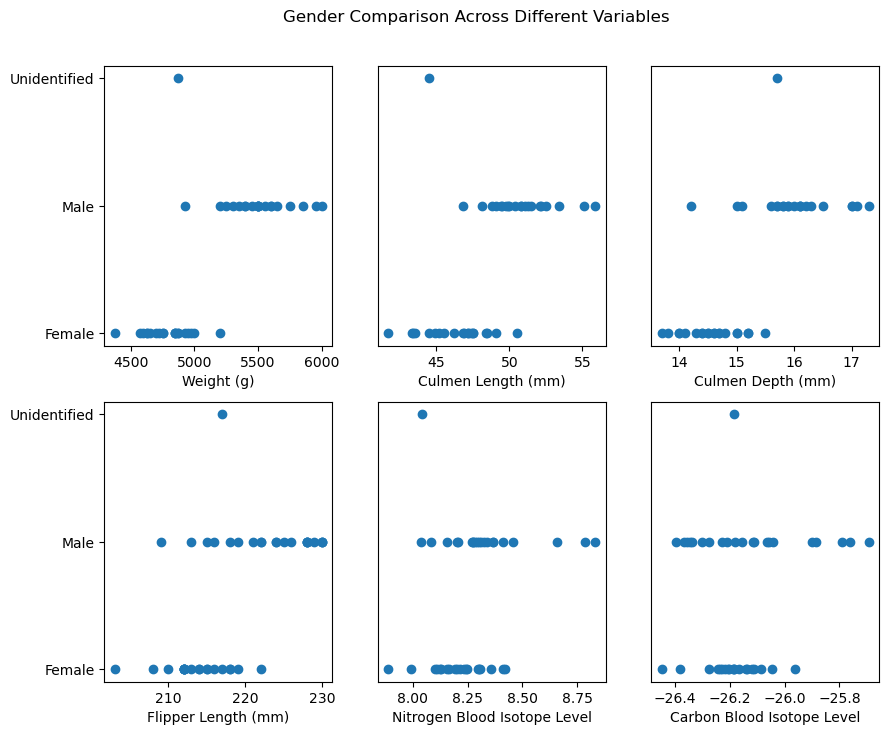

In [146]:
# Declare two variables for the existing and renamed labels on the graph.
tick1 = ["FEMALE", "MALE", "."]
tick2 = ["Female", "Male", "Unidentified"]

# Plot a multiplot with two rows and three columns.
fig, comp = plt.subplots(2, 3, figsize = (12,8))

# Plot a scatter plot for each subplot, comparing `Sex` to a different variable each time.
# Customise the labels and title appropriately.
comp[0][0].scatter(y = comparison["Sex"], x = comparison["Body Mass (g)"])
comp[0][0].set_yticks(tick1, tick2  )
comp[0][0].set_xlabel("Weight (g)")

comp[0][1].scatter(y = comparison["Sex"], x = comparison["Culmen Length (mm)"])
comp[0][1].set_yticks(ticks = "")
comp[0][1].set_xlabel("Culmen Length (mm)")

comp[0][2].scatter(y = comparison["Sex"], x = comparison["Culmen Depth (mm)"])
comp[0][2].set_yticks(ticks = "")
comp[0][2].set_xlabel("Culmen Depth (mm)")

comp[1][0].scatter(y = comparison["Sex"], x = comparison["Flipper Length (mm)"])
comp[1][0].set_yticks(tick1, tick2)
comp[1][0].set_xlabel("Flipper Length (mm)")

comp[1][1].scatter(y = comparison["Sex"], x = comparison["Delta 15 N (o/oo)"])
comp[1][1].set_yticks(ticks = "")
comp[1][1].set_xlabel("Nitrogen Blood Isotope Level")

comp[1][2].scatter(y = comparison["Sex"], x = comparison["Delta 13 C (o/oo)"])
comp[1][2].set_yticks(ticks = "")
comp[1][2].set_xlabel("Carbon Blood Isotope Level")

fig.suptitle("Gender Comparison Across Different Variables ", y = .95)

# Line to save the image to file.
# plt.savefig("DS-T36;Missing-Gender.png", dpi = 150, bbox_inches = "tight")

After comparing multiple variables, theres's no clear indication to suggest what the missing gender could be; it could slot very easily into either gender depending on the variable being viewed. This penguin will just have to be removed from the data.

In [107]:
# Remove the unidentified penguin.
data = data.drop(index = 336)

**Renaming the columns**

In [108]:
data
data.head(0)

,studyName,common_name,scientific_name,Island,Clutch Completion,egg_date,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)


We can see that the columns left have much variation in how they are named; we can amend these using a loop. The values in the `Sex` column are also all in uppercase, and as we're iterating over columns, we can resolve this at the same time.

In [109]:
# Declare lists for the existing column names to be changed, the new column names, and the indicies for those columns.
existing_col_name = [
    "studyName", "Island", "Clutch Completion", "Culmen Length (mm)",
    "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex",
    "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

new_col_name = [
    "study_name", "island", "clutch", "culmen_l",
    "culmen_d", "flipper_l", "body_mass", "sex",
    "delta_15n", "delta_13c"]

insert_location = [0, 3, 4, 6, 7, 8, 9, 10, 11, 12]

# Iterate over each list where: e = existing column name, n = new column name, and l = insert location.
for e, n, l in zip(existing_col_name, new_col_name, insert_location):
    
    # Convert the 'Sex' column's values to titlecase and add them back to the dataframe.
    if e == "Sex":         
        titlecase = [y.title() for y in data[e]]
        data[e] = titlecase
    
    # Add the renamed columns using value and location data from the existing columns, then remove the old columns.
    data.insert(l, n, data[e])
    data.drop(columns = e, inplace = True)

In [110]:
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   study_name       324 non-null    object        
 1   common_name      324 non-null    object        
 2   scientific_name  324 non-null    object        
 3   island           324 non-null    object        
 4   clutch           324 non-null    object        
 5   egg_date         324 non-null    datetime64[ns]
 6   culmen_l         324 non-null    float64       
 7   culmen_d         324 non-null    float64       
 8   flipper_l        324 non-null    float64       
 9   body_mass        324 non-null    float64       
 10  sex              324 non-null    object        
 11  delta_15n        324 non-null    float64       
 12  delta_13c        324 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 35.4+ KB


,study_name,common_name,scientific_name,island,clutch,egg_date,culmen_l,culmen_d,flipper_l,body_mass,sex,delta_15n,delta_13c
1,PAL0708,Adelie Penguin,Pygoscelis Adeliae,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,Female,8.94956,-24.69454
2,PAL0708,Adelie Penguin,Pygoscelis Adeliae,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,Female,8.36821,-25.33302
4,PAL0708,Adelie Penguin,Pygoscelis Adeliae,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,Female,8.76651,-25.32426


All columns have now been renamed and values formatted correctly.

**Duplicate records**

The only thing we haven't dealt with are duplicate records. We can quickly check for these and (where applicable) remove them . 

In [111]:
# Check for duplicate rows across all columns.
dupl_rows = data[data.duplicated()]
dupl_rows

,study_name,common_name,scientific_name,island,clutch,egg_date,culmen_l,culmen_d,flipper_l,body_mass,sex,delta_15n,delta_13c


The check returns no duplicate records. In order for the check (as defined) to return a record, all fields in each row would need to contain the same values as those of another row. Before we move on, we'll also need to quicky reset the index as the values are currently non-sequential. 

In [112]:
# Reset the index for the dataframe and save the changes.
data = data.reset_index()
data = data.drop(columns = "index")
data

,study_name,common_name,scientific_name,island,clutch,egg_date,culmen_l,culmen_d,flipper_l,body_mass,sex,delta_15n,delta_13c
0,PAL0708,Adelie Penguin,Pygoscelis Adeliae,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,Female,8.94956,-24.69454
1,PAL0708,Adelie Penguin,Pygoscelis Adeliae,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,Female,8.36821,-25.33302
2,PAL0708,Adelie Penguin,Pygoscelis Adeliae,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,Female,8.76651,-25.32426
3,PAL0708,Adelie Penguin,Pygoscelis Adeliae,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,Male,8.66496,-25.29805
4,PAL0708,Adelie Penguin,Pygoscelis Adeliae,Torgersen,No,2007-11-15,38.9,17.8,181.0,3625.0,Female,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,PAL0910,Gentoo Penguin,Pygoscelis Papua,Biscoe,No,2009-12-01,47.2,13.7,214.0,4925.0,Female,7.99184,-26.20538
320,PAL0910,Gentoo Penguin,Pygoscelis Papua,Biscoe,Yes,2009-11-22,46.8,14.3,215.0,4850.0,Female,8.41151,-26.13832
321,PAL0910,Gentoo Penguin,Pygoscelis Papua,Biscoe,Yes,2009-11-22,50.4,15.7,222.0,5750.0,Male,8.30166,-26.04117
322,PAL0910,Gentoo Penguin,Pygoscelis Papua,Biscoe,Yes,2009-11-22,45.2,14.8,212.0,5200.0,Female,8.24246,-26.11969


**Exploratory Analysis (EDA)** 

We can now start to explore the relationships between different variables. We can observe a variety of shapes in the data, with some showing positive correlation in either a linear fashion across all values or in separate clusters, and others having less clearly defined patterns. The distribtions for each variable are multimodal with one or two clear peaks, with the highest peak occurring in the central three-fifths; we can see that the smallest quantities tend to occur on the upper extreme of each distribtion (or in the last fifth). 

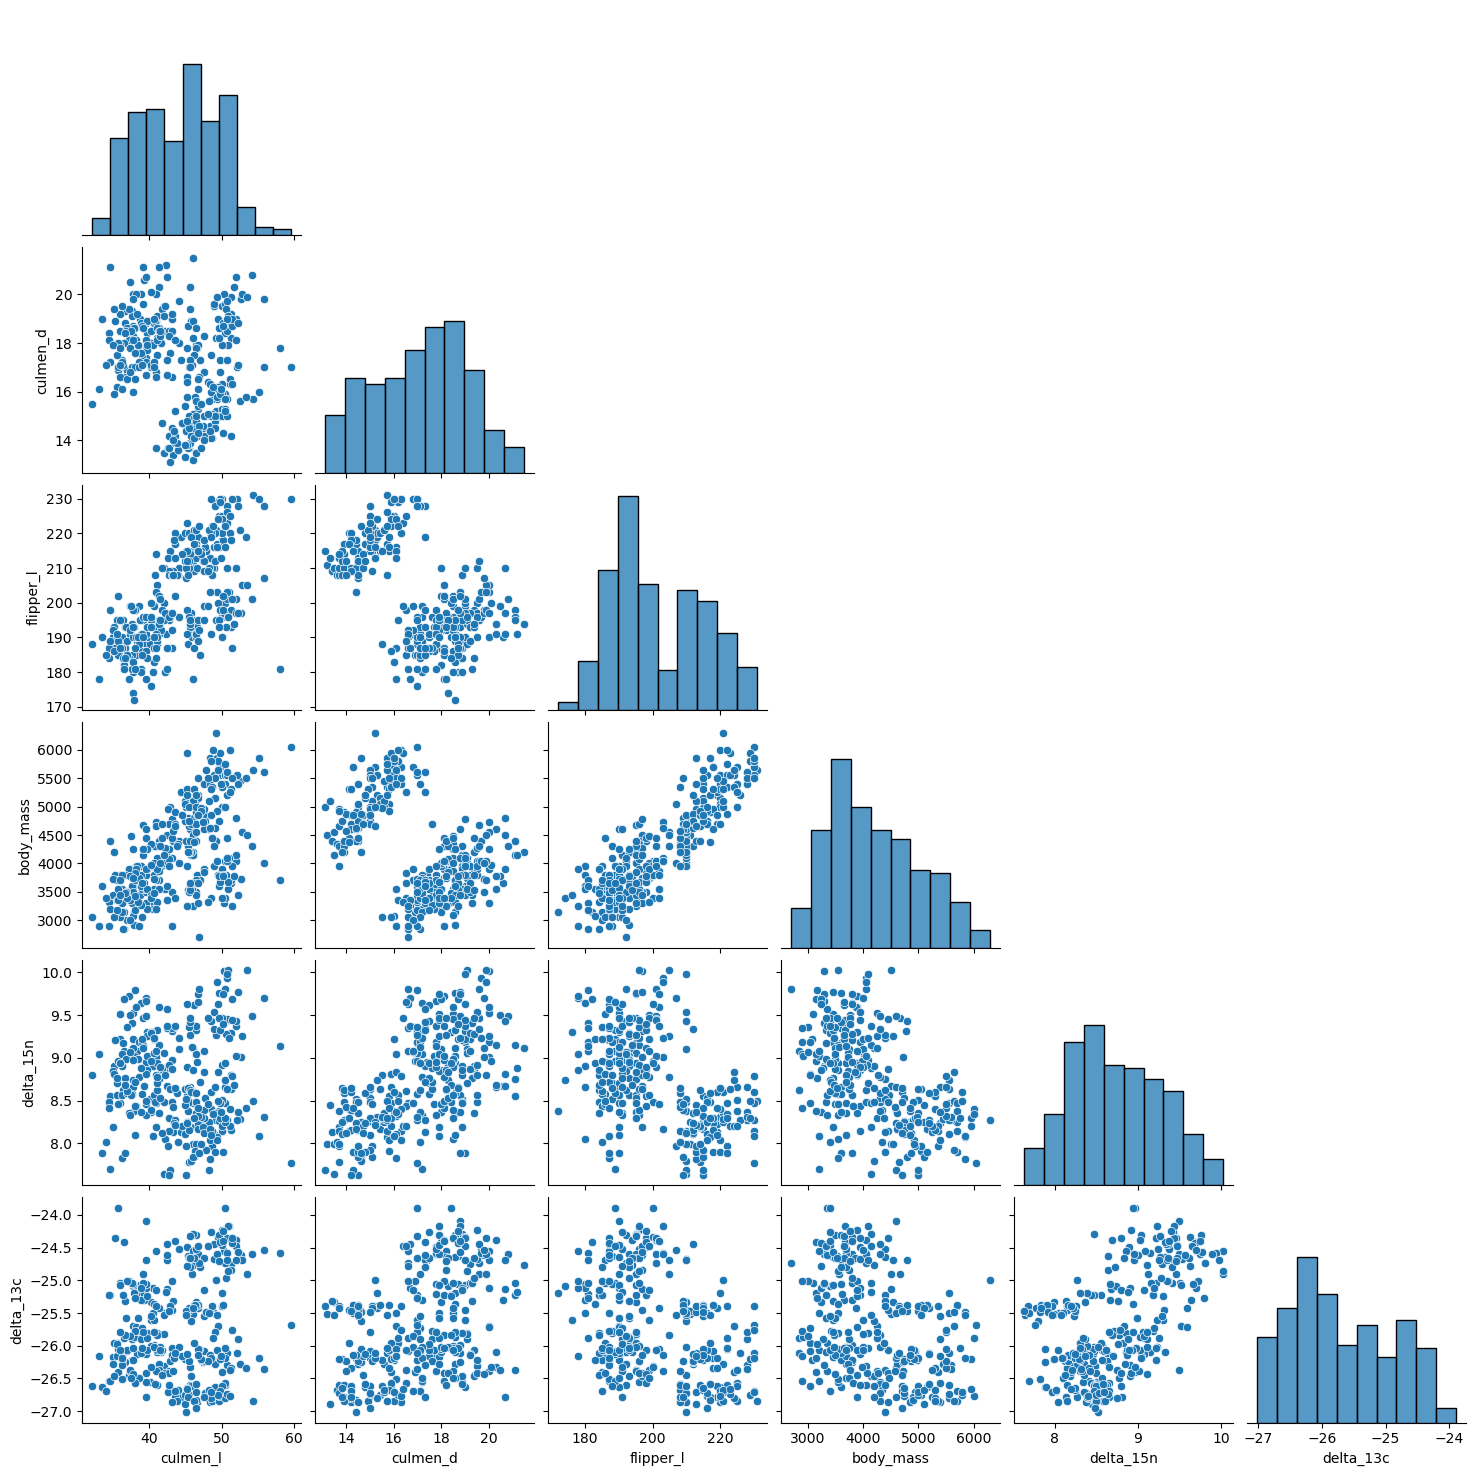

In [136]:
sns.pairplot(data, corner = True)

**EDA: Egg Dates**

We know from checking the unique values earlier for the `egg_date` column, that most of the dates occur in November. We can capture these in a variable and plot them to avoid skewed results. It doesn't make much sense to look at the dates alone, so we can include some other variables.

Text(0.03, 1.0, '2009')

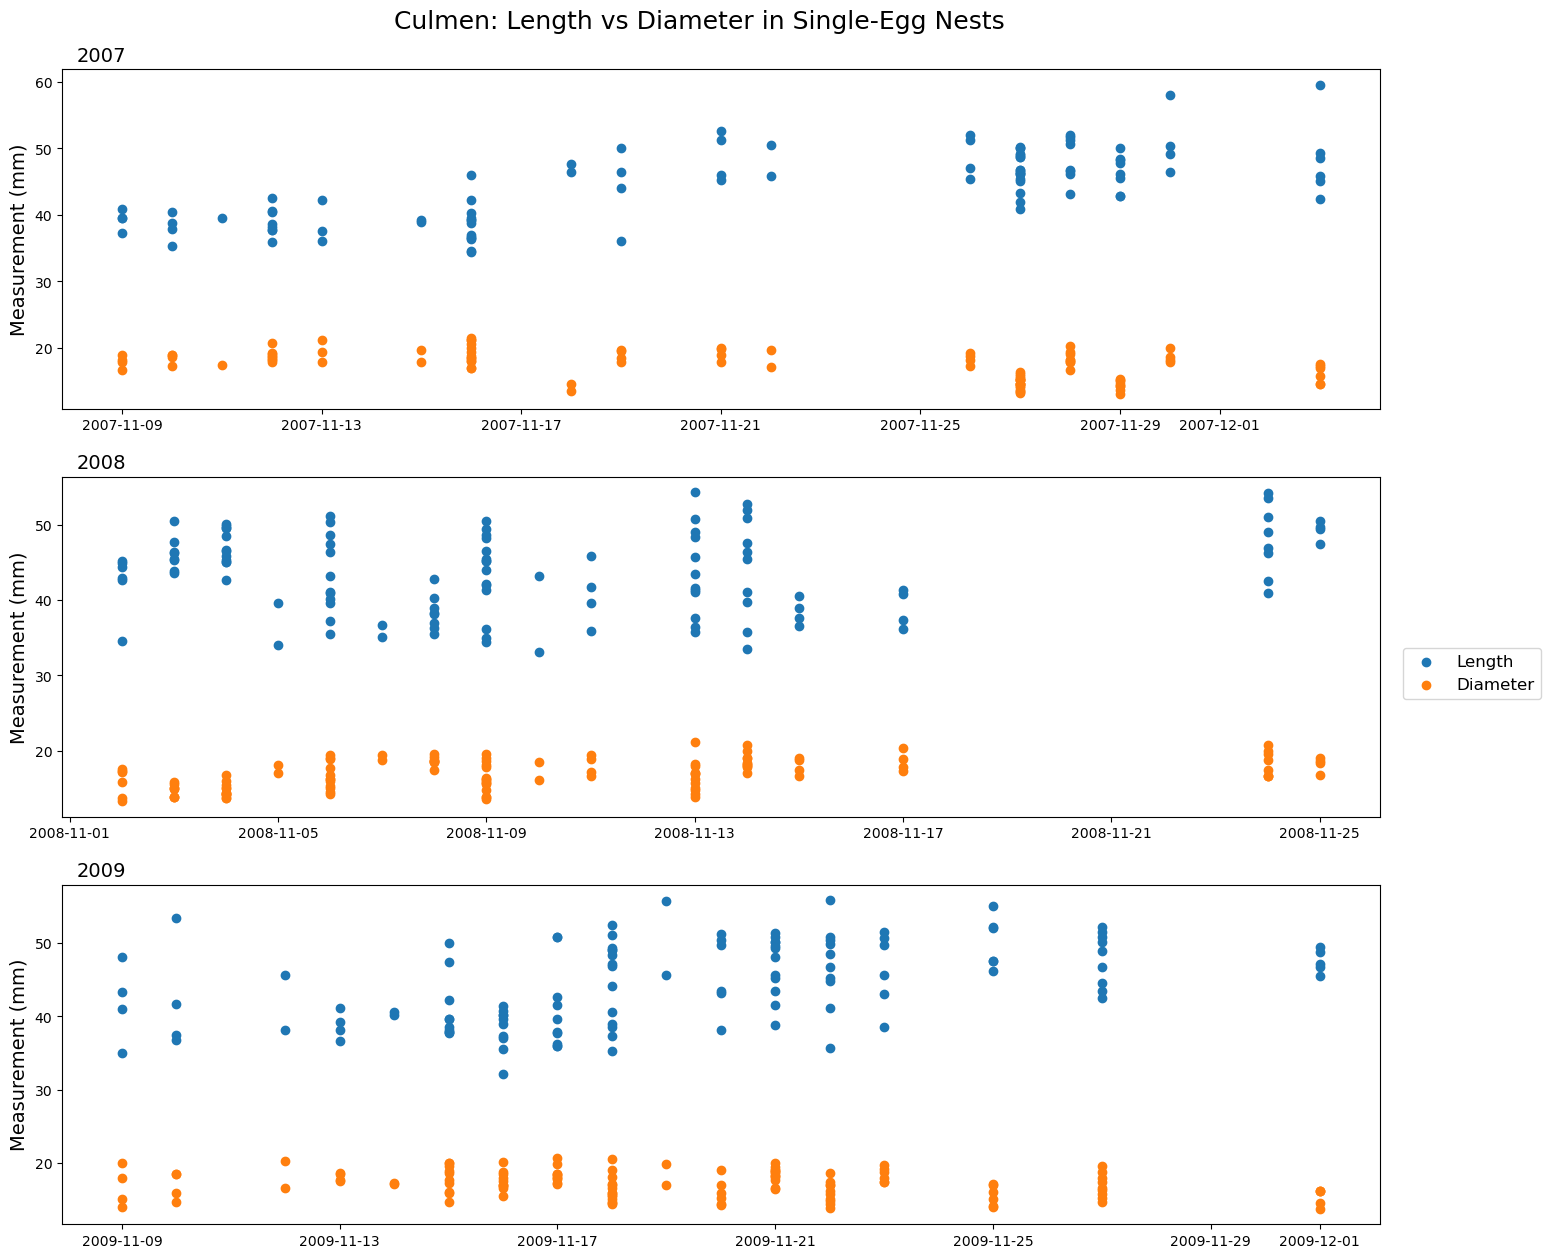

In [113]:
# Isolate the egg dates and some other columns to plot.
e_data = data.loc[:, ["egg_date", "culmen_l", "culmen_d"]]                  

# Filter by year and include only dates in November and December. Capture in variables.
e07 = e_data[(e_data["egg_date"] >= "2007-11-01") & (e_data["egg_date"] <= "2007-12-31")]
e08 = e_data[(e_data["egg_date"] >= "2008-11-01") & (e_data["egg_date"] <= "2008-12-31")]
e09 = e_data[(e_data["egg_date"] >= "2009-11-01") & (e_data["egg_date"] <= "2009-12-31")]

# Set the index for each variable as the egg date.
e07 = e07.set_index("egg_date")
e08 = e08.set_index("egg_date")
e09 = e09.set_index("egg_date")
                          
# Create a multiplot for each each year.
fig, time = plt.subplots(3,1, figsize = (17,15))

# Plot the data for each year separately.
time[0].scatter(e07.index, e07.culmen_l)
time[0].scatter(e07.index, e07.culmen_d)
time[1].scatter(e08.index, e08.culmen_l)
time[1].scatter(e08.index, e08.culmen_d)
time[2].scatter(e09.index, e09.culmen_l)
time[2].scatter(e09.index, e09.culmen_d)

# Customise the labels, titles and legend for each plot.
fig.suptitle("Culmen: Length vs Diameter in Single-Egg Nests", y = 0.92, fontsize = 18)
fig.legend(["Length", "Diameter"], loc = "upper right", bbox_to_anchor = (1, 0.5), fontsize = 12)

time[0].set_ylabel("Measurement (mm)", fontsize = 14)
time[0].set_title("2007", fontsize = 14, x = 0.03)

time[1].set_ylabel("Measurement (mm)", fontsize = 14)
time[1].set_title("2008", fontsize = 14, x = 0.03)

time[2].set_ylabel("Measurement (mm)", fontsize = 14)
time[2].set_title("2009", fontsize = 14, x = 0.03 )

# Line to save the image to file.
# plt.savefig("DS-T36;Culmen-LD-Single-Nest.png", dpi = 150, bbox_inches = "tight")

Nests were observed almost entirely in November, and we can see that the distribution of nests recorded with a single egg is fairly consistent across years. There doesn't seem to be much correlation between the size of an animal's culmen (in either dimension) and when an egg was recorded, but from what we can see, it is not a negative factor in determining whether or not a penguin will have an egg in their nest.

**EDA: Delta Variation**

Text(0.5, 1.0, 'Male')

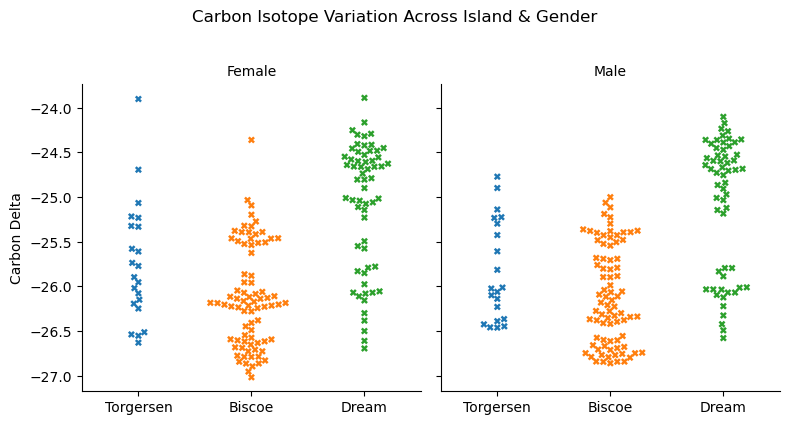

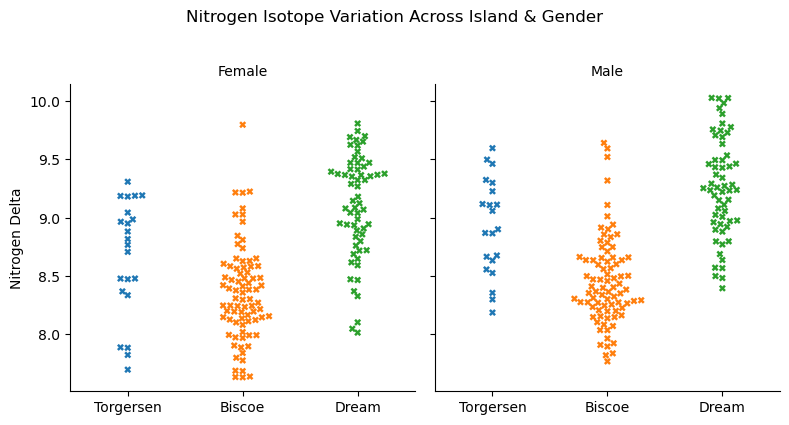

In [144]:
# Plot the deltas for each island and display each gender separately.
dv1 = sns.catplot(data = data, y = "delta_13c", x = "island", kind = "swarm", col = "sex", height = 4, marker = "X")
dv2 = sns.catplot(data = data, y = "delta_15n", x = "island", kind = "swarm", col = "sex", height = 4, marker = "X")

# Add titles to each plot.
dv1.fig.suptitle("Carbon Isotope Variation Across Island & Gender", y = 1.1)
dv2.fig.suptitle("Nitrogen Isotope Variation Across Island & Gender", y = 1.1)

# Customise the labels for each plot.
dv1.axes[0,0].set_ylabel("Carbon Delta")
dv1.axes[0,0].set_xlabel("")
dv1.axes[0,1].set_xlabel("")
dv1.axes[0,0].set_title("Female", fontsize = 10)
dv1.axes[0,1].set_title("Male", fontsize = 10)

dv2.axes[0,0].set_ylabel("Nitrogen Delta")
dv2.axes[0,0].set_xlabel("")
dv2.axes[0,1].set_xlabel("")
dv2.axes[0,0].set_title("Female", fontsize = 10)
dv2.axes[0,1].set_title("Male", fontsize = 10)

# Line to save the images to file.
# dv1.savefig("DS-T36;Delta-Island-Gender-1.png", dpi = 150, bbox_inches = "tight")
# dv2.savefig("DS-T36;Delta-Island-Gender-2.png", dpi = 150, bbox_inches = "tight")

We can observe that the deltas are greatest on Dream island, but experience the most variation on Biscoe island. We can also see that the distribution of penguins in the dataset tends to favour Biscoe island, including across gender, which is why this might be happening.  

**EDA: Penguin Distribution**

We can look at the total distribution for penguins across each island and how they compare for each group that was studied.

Text(0.5, 1.05, 'Distribution of Penguins by Island and Study Group')

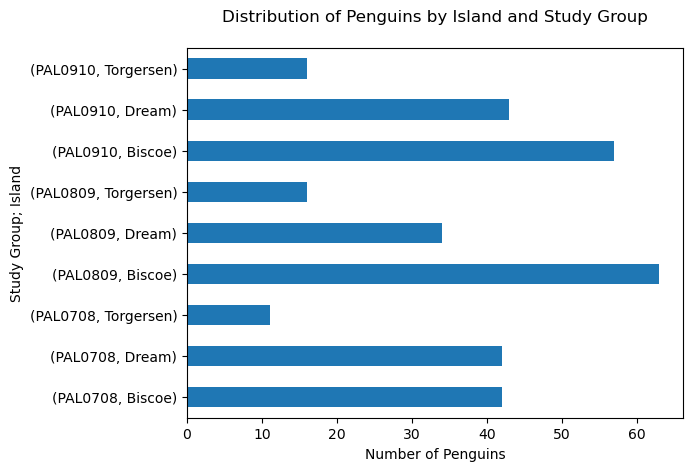

In [115]:
# Filter the view to show study name and island.
island_stu = data.loc[:, ["study_name", "island"]]

# Group the values by study name and capture the counts for each island.
i_count = island_stu.groupby("study_name")["island"].value_counts()

# Plot the data on a barchart.
i_count.plot(kind = "barh")
plt.ylabel("Study Group; Island")
plt.xlabel("Number of Penguins")
plt.title("Distribution of Penguins by Island and Study Group", y = 1.05)

# Line to save the image to file.
# plt.savefig("DS-T36;Island-Study-Distribution.png", dpi = 150, bbox_inches = "tight")

Torgersen island had the least penguins in each study group, while Biscoe island had the most. This may indicate differing penguin population sizes on each island, or could be the result of how each population was counted. Researchers studying penguins sometimes use a combination of aerial photography and statistical sampling techniques to estimate the numbers. While this can reduce the costs involved, save time and make best use of resources available, it may not result in the most accurate representation. 